### **Intro Sprint #1**
# Data Collection and Cleaning with Jupyter 

## Introduction to Jupyter Notebook

Jupyter Notebook is a really easy and user friendly way to experiment with Python code, combining code with notes and documentation. You can do all of this without having use the command line, and the resulting file can be easily published and shared with other people.

An Jupyter Notebook consists of a number of "cells," stacked on the page from top to bottom. Cells can have text or code in them. You can change a cell's type using the "Cell" menu at the top of the page; go to Cell > Cell Type and select either Code for Python code or Markdown for text. (You can also change this for the current cell using the drop-down menu in the toolbar.)

#### Text Cells
First make a new cell which can be done in different ways: you can make a new cell at the top of the page in jupyter notebook or press a(above) or b(below) depending on the location you want the cell to be. Next change its type to Markdown and then type some stuff and click run. Jupyter Notebook will "render" the text and display it on the page in rendered format. You can hit Enter or click in the cell to edit its contents again. Text in Markdown cells is rendered according to a set of conventions called [Markdown](https://www.markdownguide.org/cheat-sheet/), a language for marking up text using formatting instructions.

#### Code Cells
Make a new cell and chane its type to Code. Type code in Pyton and click run to run the code. 

In [1]:
print("This is a code cell.")
print("")
print("Any Python code you type in this cell will be run when you press the 'Run' button,")

This is a code cell.

Any Python code you type in this cell will be run when you press the 'Run' button,


You can define variables or import modules in one code cell and it will be available for you to in all subsequent code cells.

In [2]:
import random
animals = ["dog", "cat", "elephant", "zebra"]

Now, you can use the list of animals and the random module in the cell below.

In [3]:
print(random.choice(animals))

dog


## Python Modules

Modules refer to a file containing Python statements and definitions. Above, we imported the random module which has many functions for randomizing distributions of numbers. We used the choice function which returns a random element from a sequence.

Throughout, we will be using common modules.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Data Collection

For the purposes of our introductory sprint, we will be collecting data either through importing a csv file or web scraping (specifically with social media), but we will focus on web scraping in a later notebook.

In this, we will be using a dataset on poverty measures in New York City. This data was downloaded from [NYC Open Data](https://data.cityofnewyork.us/City-Government/NYCgov-Poverty-Measure-Data-2018-/cts7-vksw).

In [26]:
poverty = pd.read_csv('nyc_poverty_2018.csv')

We can use the head function to show the first five rows of the dataset (or tail to show the last five rows). We can also use the shape function to see the dimensions of our dataset.

In [27]:
display(poverty.head())
print(poverty.shape)

,SERIALNO,SPORDER,PWGTP,WGTP,AGEP,CIT,REL,SCH,SCHG,SCHL,...,Povunit_ID,Povunit_Rel,PreTaxIncome_PU,RETP_adj,RNTP_adj,SEMP_adj,SSIP_adj,SSP_adj,TotalWorkHrs_PU,WAGP_adj
0,1,1,95,95,31,1,0,1,0,22.0,...,1,1,127650.22,0.0,0.0,0.0,0.0,0.000,2,127650.220
1,16,1,181,181,63,1,0,1,0,22.0,...,1,1,346479.19,0.0,0.0,0.0,0.0,0.000,2,182357.450
2,16,2,210,181,65,1,1,1,0,19.0,...,1,2,346479.19,0.0,0.0,0.0,0.0,12157.164,2,0.000
3,47,1,62,62,68,4,0,1,0,1.0,...,1,1,155003.84,0.0,0.0,0.0,0.0,27353.619,1,91178.727
4,47,2,71,62,63,4,1,1,0,1.0,...,1,2,155003.84,0.0,0.0,0.0,0.0,0.000,1,36471.492


(68273, 61)


After looking at our data, we can see that we have a ton of columns (61), and the columns don't seem to have very self explanatory names. On the NYC Open Data website, the dataset comes with a data dictionary that explains the columns. If you want, you can look at all the column descriptions. But, for our purposes, we will just show you how to rename them and drop unnecassry columns.

We will drop uncessary columns by only selecting the ones we want to keep. There are many more ways to drop columns that you can search up.

In [28]:
poverty = poverty[['AgeCateg', 'Boro','CitizenStatus', 'EducAttain', 'EST_Childcare', 'NYCgov_Income',
                   'EST_PovGap','EST_PovGapIndex', 'Ethnicity']]
poverty.head()

,AgeCateg,Boro,CitizenStatus,EducAttain,EST_Childcare,NYCgov_Income,EST_PovGap,EST_PovGapIndex,Ethnicity
0,2,2,1,4.0,0.0,81417.961,0.0,0.0,4
1,2,3,1,4.0,0.0,228417.950,0.0,0.0,1
2,3,3,1,3.0,0.0,228417.950,0.0,0.0,1
3,3,2,2,1.0,0.0,117058.230,0.0,0.0,1
4,2,2,2,1.0,0.0,117058.230,0.0,0.0,1


Now, let's rename our columns into something more descriptive and drop all rows with na values.

In [29]:
poverty=poverty.copy()
poverty.rename(columns = {'AgeCateg' : 'age', 'Boro' : 'borough', 'CitizenStatus' : 'citizen', 'EducAttain' : 'education',
                                         'EST_Childcare' : 'childcare', 'EST_PovGap' : 'pov_gap', 'EST_PovGapIndex' : 'pov_gap_ratio',
                          'Ethnicity' : 'ethnicity', 'NYCgov_Income': 'income'},
               inplace = True)
poverty.dropna()
poverty.head()

,age,borough,citizen,education,childcare,income,pov_gap,pov_gap_ratio,ethnicity
0,2,2,1,4.0,0.0,81417.961,0.0,0.0,4
1,2,3,1,4.0,0.0,228417.950,0.0,0.0,1
2,3,3,1,3.0,0.0,228417.950,0.0,0.0,1
3,3,2,2,1.0,0.0,117058.230,0.0,0.0,1
4,2,2,2,1.0,0.0,117058.230,0.0,0.0,1


Looking at the rows of these columns seems quite undescriptive as well. In our data dictionary, we can see that each number corresponds to a different category for each column.

For example, in borough:
1 = Bronx, 2 = Brooklyn, 3 = Manhattan, 4 = Queens, 5 = Staten Island

Let's replace our values with their categorical values. There are many ways to do this, but in this example we use a [for loop](https://wiki.python.org/moin/ForLoop) to loop through all the values in the column and append their string values to an array based on their condition.

In [30]:
borough = []
for x in poverty['borough']:
    if x == 1:
        borough.append('Bronx')
    if x == 2:
        borough.append('Brooklyn')
    if x == 3:
        borough.append('Manhattan')
    if x == 4:
        borough.append('Queens')
    if x == 5:
        borough.append('Staten Island')
poverty['borough'] = borough
poverty.head()

,age,borough,citizen,education,childcare,income,pov_gap,pov_gap_ratio,ethnicity
0,2,Brooklyn,1,4.0,0.0,81417.961,0.0,0.0,4
1,2,Manhattan,1,4.0,0.0,228417.950,0.0,0.0,1
2,3,Manhattan,1,3.0,0.0,228417.950,0.0,0.0,1
3,3,Brooklyn,2,1.0,0.0,117058.230,0.0,0.0,1
4,2,Brooklyn,2,1.0,0.0,117058.230,0.0,0.0,1


So now we can see that our borough values are populated with meaningful words! We'll show a few more examples, and if you want you can try the remaining column on your own. For childcare and the poverty gap, these are dollar amounts so we do not have to alter them.

In [31]:
# age
age = []
for x in poverty['age']:
    if x == 1:
        age.append('>18')
    if x == 2:
        age.append('18-64')
    if x == 3:
        age.append('65+')
poverty['age'] = age
poverty.head()

# citizen
citizen = []
for x in poverty['citizen']:
    if x == 1:
        citizen.append('citizen')
    if x == 2:
        citizen.append('citizen')
    if x == 3:
        citizen.append('noncitizen')
poverty['citizen'] = citizen




In [32]:
poverty.tail(30)

,age,borough,citizen,education,childcare,income,pov_gap,pov_gap_ratio,ethnicity
68243,>18,Brooklyn,citizen,1.0,0.000,223240.0600,0.0000,0.000000,2
68244,18-64,Brooklyn,citizen,4.0,0.000,223240.0600,0.0000,0.000000,2
68245,65+,Bronx,citizen,3.0,0.000,27731.0840,0.0000,0.000000,4
68246,18-64,Queens,citizen,2.0,0.000,79202.1640,0.0000,0.000000,1
68247,65+,Queens,citizen,4.0,0.000,79202.1640,0.0000,0.000000,1
68248,65+,Brooklyn,citizen,4.0,0.000,7175.2554,9066.3447,0.558217,1
68249,18-64,Queens,citizen,3.0,0.000,166437.5600,0.0000,0.000000,1
68250,18-64,Queens,citizen,4.0,0.000,166437.5600,0.0000,0.000000,1
68251,18-64,Queens,citizen,1.0,0.000,166437.5600,0.0000,0.000000,1
68252,65+,Queens,citizen,2.0,0.000,166437.5600,0.0000,0.000000,1


## Introduction to Data Visualization with Python

We use data visualization to help to tell stories by curating data into a form easier to understand, displaying trends, relationships, outliers. They not only are beautiful, but are functional.

Let's start with exploring some of the relationships between the variables in our new, cleaned dataframe.

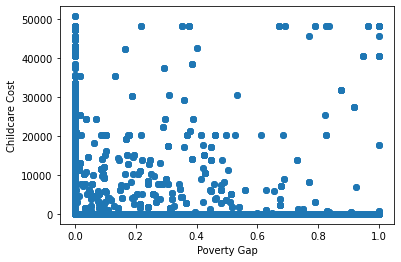

In [15]:
plt.scatter(poverty['pov_gap_ratio'], poverty['childcare'])
plt.xlabel('Poverty Gap')
plt.ylabel('Childcare Cost')
plt.show()

Import seaborn (a data visualization library built on top of matplot lib).

In [22]:
import seaborn as sns
# if you don't have seaborn type !pip install seaborn into this notebook or pip install seaborn into your terminal.

Let's look at where childcare cost and the poverty gap ratio does not equal 0 and display it colored by borough.

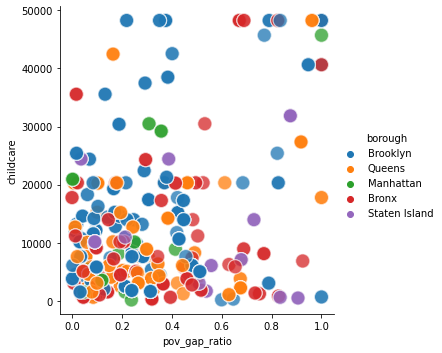

In [21]:
poverty_childcare =  poverty[(poverty['pov_gap_ratio'] > 0) & (poverty['childcare'] > 0)]
sns.relplot(x='pov_gap_ratio', y='childcare', hue="borough", s=200, alpha=.5, data=poverty_childcare);

We can visually separate the boroughs as well and include a line of best fit to explore our data in greater detail.

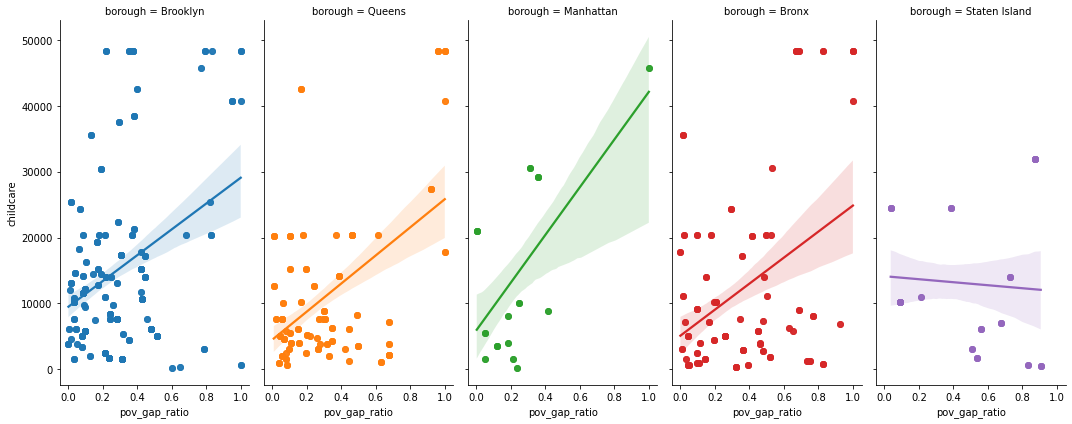

In [34]:
sns.lmplot(x='pov_gap_ratio', y='childcare', hue ='borough',col='borough',
               data=poverty_childcare, height=6, aspect=.5)

plt.show()


From our data dictionary:
> The **poverty gap** is a dollar measure of resources needed to escape poverty. The poverty gap index captures the intensity of poverty - the difference in economic well-being as individuals get closer to (or surpass) their poverty threshold. It is possible for populations with similar poverty rates to have divergent poverty gap indexes. We recommend that estimates of the poverty gap index should be used at the  individual (not family) level, to capture the full number of people affected. For example, mean poverty gap index  for children should take the mean index for all children. See Chapter 3  of NYCgov Poverty Measure Report, 2005-2016 (published 2018) for more on the poverty gap and its use.

As we can see, as the poverty gap index (or ratio) increases, childcare costs increase for most boroughs. It costs quite a bit to raise a child in NYC, and that has a [significant effect](https://www.refinery29.com/en-us/2014/08/73114/raising-kid-in-nyc-cost-expensive) on a families ability to escape poverty.


